Creates a file with all of the unique genes in the input files. Also, creates a list of the proteins that are only phosphorylated but not in the interactome.

# Import files and libraries

In [18]:
%pylab inline
import pyupset as pyu
import pandas as pd
import matplotlib_venn as mv

#r-escapes the whole string
networkInter = r'Z:\Yeast\ChasmanNetwork-DirUndir.txt'
prizes = r'Z:\Yeast\prizes\prizes.txt'

dfNetwork = pd.read_csv(networkInter, sep = '\t', names = ["GeneA", "GeneB", "Weight", "Direction"])
dfPrizes = pd.read_csv(prizes, sep = '\t', names = ["ORF", "Fold"])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
print dfNetwork
print dfPrizes

        GeneA    GeneB  Weight Direction
0     YCL032W  YLR006C     0.5         D
1     YCL032W  YNR031C     0.5         D
2     YCL032W  YJL128C     0.5         D
3     YNR031C  YJL128C     0.5         D
4     YJL128C  YLR113W     0.5         D
5     YAL040C  YMR037C     0.5         D
6     YJL164C  YMR037C     0.5         D
7     YOR360C  YJL164C     0.5         D
8     YOR360C  YPL203W     0.5         D
9     YOR360C  YKL166C     0.5         D
10    YER177W  YMR037C     0.5         D
11    YER177W  YKL062W     0.5         D
12    YDR099W  YMR037C     0.5         D
13    YDR099W  YKL062W     0.5         D
14    YLR362W  YJL128C     0.5         D
15    YBR140C  YNL098C     0.5         D
16    YAL056W  YHR005C     0.5         D
17    YEL062W  YJR066W     0.5         D
18    YHL023C  YJR066W     0.5         D
19    YJR066W  YHR205W     0.5         D
20    YJL141C  YIL033C     0.5         D
21    YKL166C  YJL141C     0.5         D
22    YHR135C  YDR011W     0.5         D
23    YOL113W  Y

# Drop unnecessary columns

In [20]:
dfNetwork.drop('Weight', axis=1, inplace=True)
dfNetwork.drop('Direction', axis = 1, inplace = True)
dfPrizes.drop('Fold', axis=1, inplace=True)
print dfNetwork
print dfPrizes

        GeneA    GeneB
0     YCL032W  YLR006C
1     YCL032W  YNR031C
2     YCL032W  YJL128C
3     YNR031C  YJL128C
4     YJL128C  YLR113W
5     YAL040C  YMR037C
6     YJL164C  YMR037C
7     YOR360C  YJL164C
8     YOR360C  YPL203W
9     YOR360C  YKL166C
10    YER177W  YMR037C
11    YER177W  YKL062W
12    YDR099W  YMR037C
13    YDR099W  YKL062W
14    YLR362W  YJL128C
15    YBR140C  YNL098C
16    YAL056W  YHR005C
17    YEL062W  YJR066W
18    YHL023C  YJR066W
19    YJR066W  YHR205W
20    YJL141C  YIL033C
21    YKL166C  YJL141C
22    YHR135C  YDR011W
23    YOL113W  YMR210W
24    YMR158W   cyc263
25    YPL031C  YFR036W
26    YBR160W  YJL092W
27    YNL307C  YJL194W
28    YDL191W   cyc246
29    YPL045W   cyc404
...       ...      ...
7586  YDR420W  YHR154W
7587  YGL209W  YGR014W
7588  YGL035C  YGR014W
7589  YGR014W  YLR229C
7590  YER118C  YGR014W
7591  YER118C  YJL128C
7592  YER118C  YNL152W
7593  YDL117W  YER118C
7594  YER118C  YOR208W
7595  YCL027W  YER118C
7596  YBR023C  YER118C
7597  YER11

# Find unique values

In [21]:
uniqueGeneA = dfNetwork.GeneA.unique()
uniqueGeneB = dfNetwork.GeneB.unique()
uniqueORF = dfPrizes.ORF.unique()

# Sort those unique values

In [22]:
uniqueGeneA.sort()
uniqueGeneB.sort()
uniqueORF.sort()

# Output to text files

In [23]:
f=open('uniqueORF.txt','w')
for ORF in uniqueORF:
    f.write(ORF+'\n')

f.close()

In [24]:
f=open('uniqueGeneA.txt','w')
for gene in uniqueGeneA:
    f.write(gene+'\n')

f.close()

In [25]:
f=open('uniqueGeneB.txt','w')
for gene in uniqueGeneB:
    f.write(gene+'\n')

f.close()

In [26]:
print len(uniqueGeneA)
print len(uniqueGeneB)
print len(uniqueORF)


1900
2272
1596


# Create venn diagram

{'additional': [],
 'base_set_size': <matplotlib.axes._subplots.AxesSubplot at 0x8d15be0>,
 'figure': <matplotlib.figure.Figure at 0x93ca518>,
 'intersection_bars': <matplotlib.axes._subplots.AxesSubplot at 0x968c6d8>,
 'intersection_matrix': <matplotlib.axes._subplots.AxesSubplot at 0x979b860>,
 'names': <matplotlib.axes._subplots.AxesSubplot at 0x9993e48>}

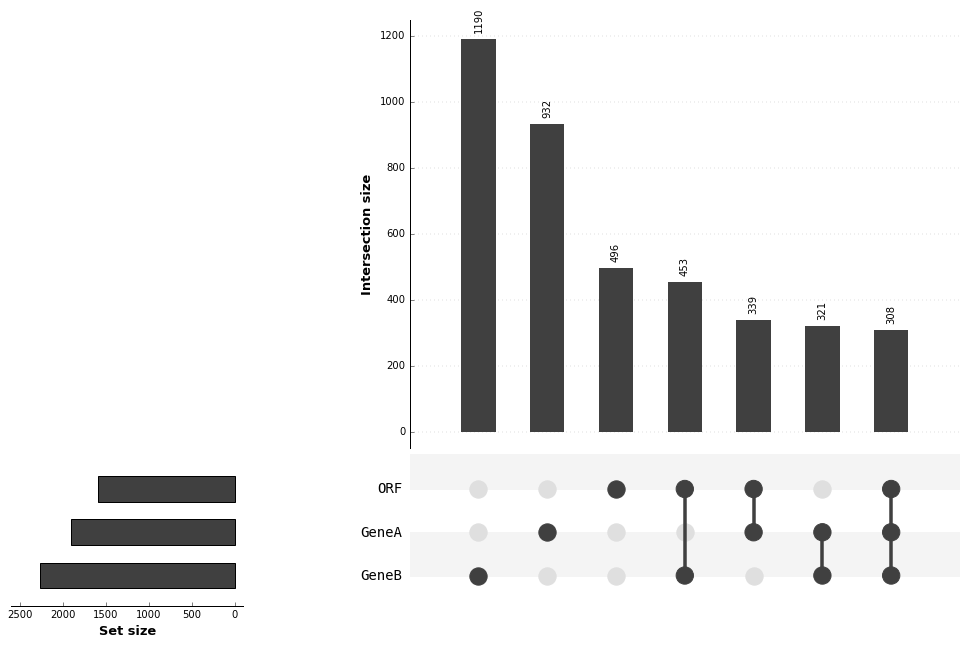

In [27]:
df1 = pd.DataFrame(data = uniqueGeneA, columns=['Items'])
df2 = pd.DataFrame(data = uniqueGeneB, columns=['Items'])
df3 = pd.DataFrame(data = uniqueORF, columns=['Items'])

pyu.plot({'GeneA':df1, 'GeneB':df2, 'ORF':df3})

In [33]:
proteinsOnlyPhospho = list(set(uniqueORF) - (set(uniqueGeneA).union(set(uniqueGeneB))))

In [34]:
print len(proteinsOnlyPhospho)
print len(uniqueORF)

496
1596


In [37]:
f=open('proteinsNotInNetwork.txt','w')
for protein in proteinsOnlyPhospho:
    f.write(protein+'\n')

f.close()